# **About Walmart:**
Walmart is an American multinational retail corporation that operates a chain of supercentres, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# **Business Problem:**
The Management team at Walmart Inc. wants to analyse the customer purchase behaviour (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.
They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# **Dataset:**
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

## **1. Defining Problem Statement and Analyzing basic metrics:**
### **1A. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) and statistical summary.**

In [127]:
 #Importing the essential library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the warningd
import warnings
warnings.filterwarnings("ignore")

In [128]:
#Loading the data set
data = pd.read_csv("walmart_data.csv")

In [129]:
#Checking the first 5 rows
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [130]:
#Checking the shape of our data
data.shape

(550068, 10)

Our data has 550068 rows and 10 features.

In [131]:
#Checking the data type of each column
data.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [132]:
#Checking the information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [133]:
#Chanhing the datatype of some columns into categorical one excluding Purchase attribute
for i in data.columns[:-1]:
  data[i] = data[i].astype('object')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [134]:
#Checking the null values
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


* We can see that our dataset has zero missing value.

In [135]:
#Checking the summary of data
data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


* The purchase amounts vary widely, with the minimum recorded purchase being 12 dollar and the maximum reaching 23961 dollar.

* The median purchase amount of 8047 dollar is notably lower than the mean purchase amount of 9264 dollar, indicating a right-skewed distribution where a few high-value purchases pull up the mean

In [136]:
#Checking the statistical summary of object features
data.describe(include='object')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


##Inferences:

* There is no missing value in the data.
* There are 3631 unique product ID's in the data set.
* P00265242 is the most sold product ID.
* There are 5891 unique users.
* There are 7 unique groups and most of the purchase belongs to age 26-35 group.
* There are 3 unique city category with category B being the highest.
* 5 unique values for stay_in_current_city_years with 1 being the highest.
* Male purchase count is much higher than female.
* Unmarried people contribute more in terms of the count for the purchase.
* There are 20 unique product categories with 5 being the highest.

In [137]:
#Duplicate detection
data.duplicated().value_counts()

,count
False,550068


There are no duplicate entries in the dataset

### **1B. Non-Graphical Analysis: Value counts and unique attributes.**

In [138]:
# Value counts, unique attributes and total items for column "User_ID"

print("Value counts for User_ID:")
print(data['User_ID'].value_counts())
print('***********************************************************************************')
print("Unique values in User_ID:")
print(data['User_ID'].unique())
print('***********************************************************************************')
print("Total unique values in User_ID:", len(data['User_ID'].unique()))

Value counts for User_ID:
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1004991       7
1005391       7
1000094       7
1005608       7
1000708       6
Name: count, Length: 5891, dtype: int64
***********************************************************************************
Unique values in User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
***********************************************************************************
Total unique values in User_ID: 5891


In [139]:
# Value Counts, unique attributes and total unique items for column "Product_ID"

print("Value counts for Product_ID:")
print(data['Product_ID'].value_counts())
print('***********************************************************************************')
print("Unique values in Product_ID:")
print(data['Product_ID'].unique())
print('***********************************************************************************')
print("Total unique values in Product_ID:", len(data['Product_ID'].unique()))

Value counts for Product_ID:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00325342       1
P00312542       1
P00008942       1
P00315142       1
P00365942       1
Name: count, Length: 3631, dtype: int64
***********************************************************************************
Unique values in Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
***********************************************************************************
Total unique values in Product_ID: 3631


In [140]:
# Value Counts, unique attributes and total unique items for column "Gender"

print("Value counts for Gender:")
print(data['Gender'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Gender:")
print(data['Gender'].unique())
print('------------------------------------------------------')
print('Total Unique "Gender":')
print(data['Gender'].nunique())

Value counts for Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64
------------------------------------------------------
Unique attributes for Gender:
['F' 'M']
------------------------------------------------------
Total Unique "Gender":
2


In [141]:
data['Gender'].value_counts(normalize=True)

,proportion
Gender,
M,0.753105
F,0.246895


In [142]:
#Checking how Gender is spread on the basis of distinct users

df_gen = data.groupby('User_ID')['Gender'].unique().value_counts(normalize=True)
df_gen

,proportion
Gender,
[M],0.717196
[F],0.282804


In [143]:
# Value Counts, unique attributes and total unique items for column "Age"

print("Value counts for Age:")
print(data['Age'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Age:")
print(data['Age'].unique())
print('------------------------------------------------------')
print('Total Unique "Age":')
print(data['Age'].nunique())

Value counts for Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
------------------------------------------------------
Unique attributes for Age:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
------------------------------------------------------
Total Unique "Age":
7


In [144]:
#Checking how Age is spread on the basis of distinct users

df_age = data.groupby('User_ID')['Age'].unique().value_counts(normalize=True)
df_age

,proportion
Age,
[26-35],0.348498
[36-45],0.198099
[18-25],0.181463
[46-50],0.090137
[51-55],0.081650
[55+],0.063147
[0-17],0.037006


In [145]:
# Value Counts, unique attributes and total unique items for column "Occupation"

print("Value counts for Occupation:")
print(data['Occupation'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Occupation:")
print(data['Occupation'].unique())
print('------------------------------------------------------')
print('Total Unique "Occupations":')
print(data['Occupation'].nunique())

Value counts for Occupation:
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64
------------------------------------------------------
Unique attributes for Occupation:
[10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
------------------------------------------------------
Total Unique "Occupations":
21


In [146]:
#Checking how Occupation is spread on the basis of distinct users

df_occupation = data.groupby('User_ID')['Occupation'].unique().value_counts(normalize=True)
df_occupation

,proportion
Occupation,
[4],0.125615
[0],0.116788
[7],0.113563
[1],0.087761
[17],0.083347
[12],0.063826
[14],0.049907
[20],0.046342
[2],0.043456


In [147]:
# Value Counts, unique attributes and total unique items for column "City_Category"

print("Value counts for City_Category:")
print(data['City_Category'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for City_Category:")
print(data['City_Category'].unique())
print('------------------------------------------------------')
print('Total Unique "City_Category":')
print(data['City_Category'].nunique())

Value counts for City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
------------------------------------------------------
Unique attributes for City_Category:
['A' 'C' 'B']
------------------------------------------------------
Total Unique "City_Category":
3


In [148]:
#Checking how City_Category is spread on the basis of distinct users

df_city = data.groupby('User_ID')['City_Category'].unique().value_counts(normalize=True)
df_city

,proportion
City_Category,
[C],0.532847
[B],0.289764
[A],0.177389


In [149]:
# Checking the age group distribution in different city categories

df_age_city = pd.crosstab(index = data['City_Category'],columns =  data['Age'], margins = True, normalize='index')
df_age_city

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


In [150]:
# Value Counts, unique attributes and total unique items for column "Stay_In_Current_City_Years"

print("Value counts for Stay_In_Current_City_Years:")
print(data['Stay_In_Current_City_Years'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Stay_In_Current_City_Years:")
print(data['Stay_In_Current_City_Years'].unique())
print('------------------------------------------------------')
print('Total Unique "Stay_In_Current_City_Years":')
print(data['Stay_In_Current_City_Years'].nunique())

Value counts for Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64
------------------------------------------------------
Unique attributes for Stay_In_Current_City_Years:
['2' '4+' '3' '1' '0']
------------------------------------------------------
Total Unique "Stay_In_Current_City_Years":
5


In [151]:
# Checking how Stay_In_Current_City_Years is spread on the basis of distinct users

df_city_stay = data.groupby('User_ID')['Stay_In_Current_City_Years'].unique().value_counts(normalize=True)
df_city_stay

,proportion
Stay_In_Current_City_Years,
[1],0.354099
[2],0.194364
[3],0.166186
[4+],0.154303
[0],0.131047


In [152]:
# Value Counts, unique attributes and total unique items for column "Marital_Status"

print("Value counts for Marital_Status:")
print(data['Marital_Status'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Marital_Status:")
print(data['Marital_Status'].unique())
print('------------------------------------------------------')
print('Total Unique "Marital_Status":')
print(data['Marital_Status'].nunique())

Value counts for Marital_Status:
Marital_Status
0    324731
1    225337
Name: count, dtype: int64
------------------------------------------------------
Unique attributes for Marital_Status:
[0 1]
------------------------------------------------------
Total Unique "Marital_Status":
2


In [153]:
# Checking how Marital_Status spread on the basis of distinct users

df_marital_status = data.groupby('User_ID')['Marital_Status'].unique().value_counts(normalize=True)
df_marital_status

,proportion
Marital_Status,
[0],0.580037
[1],0.419963


In [154]:
# Value Counts, unique attributes and total unique items for column "Product_Category"

print("Value counts for Product_Category:")
print(data['Product_Category'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Product_Category:")
print(data['Product_Category'].unique())
print('------------------------------------------------------')
print('Total Unique "Product_Category":')
print(data['Product_Category'].nunique())

Value counts for Product_Category:
Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64
------------------------------------------------------
Unique attributes for Product_Category:
[3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19]
------------------------------------------------------
Total Unique "Product_Category":
20


In [155]:
# Value Counts, unique attributes and total unique items for column "Purchase"

print("Value counts for Purchase:")
print(data['Purchase'].value_counts())
print('------------------------------------------------------')
print("Unique attributes for Purchase:")
print(data['Purchase'].unique())
print('------------------------------------------------------')
print('Total Unique "Purchase":')
print(data['Purchase'].nunique())

Value counts for Purchase:
Purchase
7011     191
7193     188
6855     187
6891     184
6960     183
        ... 
18913      1
14361      1
5572       1
7290       1
15127      1
Name: count, Length: 18105, dtype: int64
------------------------------------------------------
Unique attributes for Purchase:
[ 8370 15200  1422 ...   135   123   613]
------------------------------------------------------
Total Unique "Purchase":
18105


# **Inferences:**
* Approximately 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).
* 75% of the users are Male and 25% are Female.
* 60% are Single and 40% are Married.
* 35% are staying in the city from 1 year, 18% from 2 years, 17% from 3 years.

* Total of 20 product categories are there.
* There are 5891 different types of User_ID, 3631 different types of Product_ID, 20 different types of occupations, 3 different types of City_Category, 5 different types of Stay_In_Current_City_Years and 20 different types of Product Categories in the city.
* We can see 35% of the users are aged 26-35. 73% of users are aged between 18-45.
* From the "Age" observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.So, we can infer users aged 26-35 are more frequent customers.

* We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.
* 53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.
* We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.

### **1C. Visual Analysis- Univariate.**

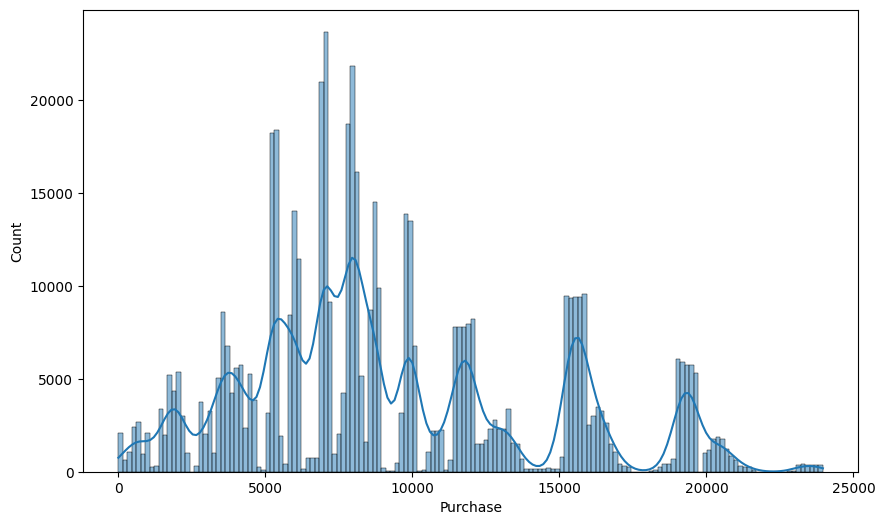

In [156]:
#Plotting histogram with kde plot for Purchase attribute
plt.figure(figsize=(10,6))
sns.histplot(data['Purchase'], kde=True)
plt.show()

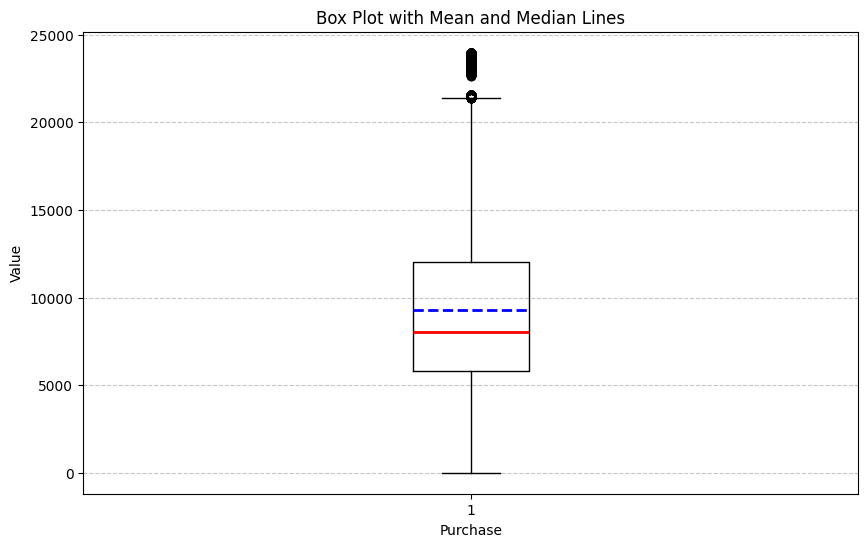

In [157]:
# Create the box plot with mean and median lines
plt.figure(figsize=(10, 6))
plt.boxplot(data=data, x='Purchase', showmeans=True, meanline=True,
            medianprops=dict(color='red', linewidth=2),  # Customize median line
            meanprops=dict(color='blue', linestyle='--', linewidth=2)) # Customize mean line

# Add labels and title
plt.title('Box Plot with Mean and Median Lines')
plt.ylabel('Value')
plt.xlabel('Purchase')

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.

# **Understanding the distribution of data for the categorical variables**
* Gender
* Age
* Occupation
* City_Category
* Stay_In_Current_City_Years
* Marital_Status
* Product_Category

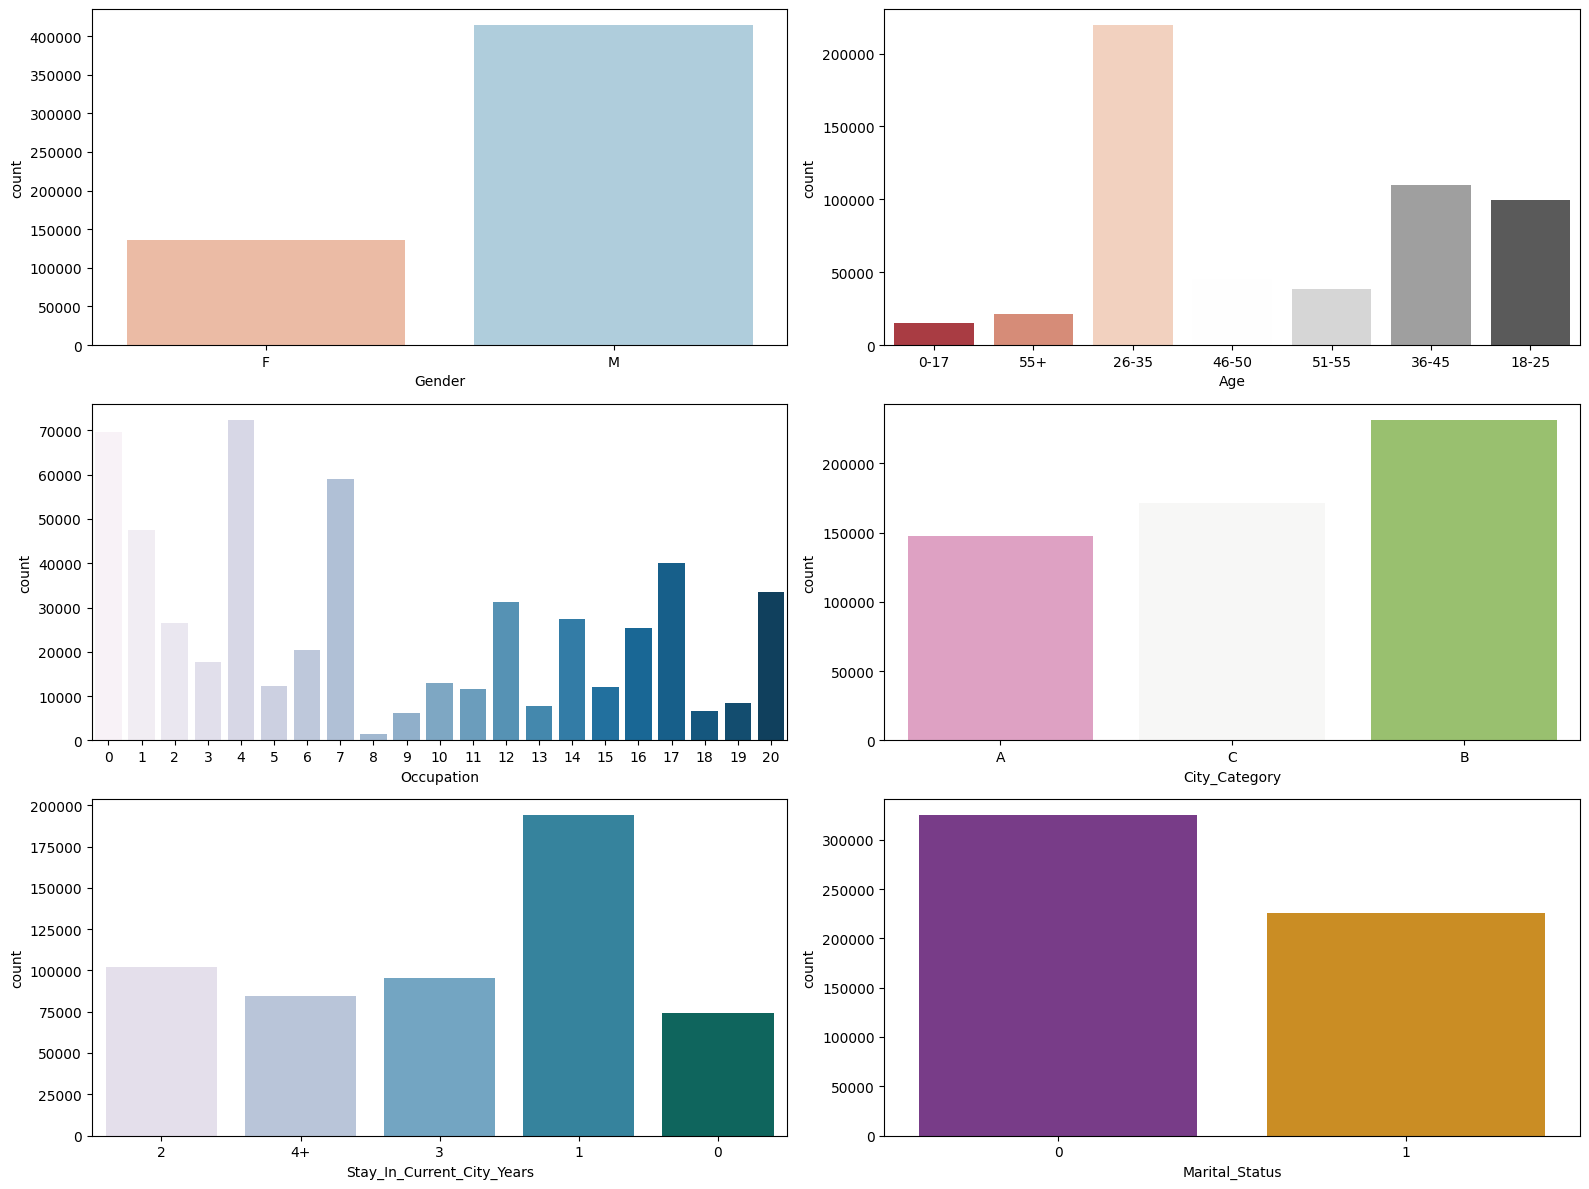

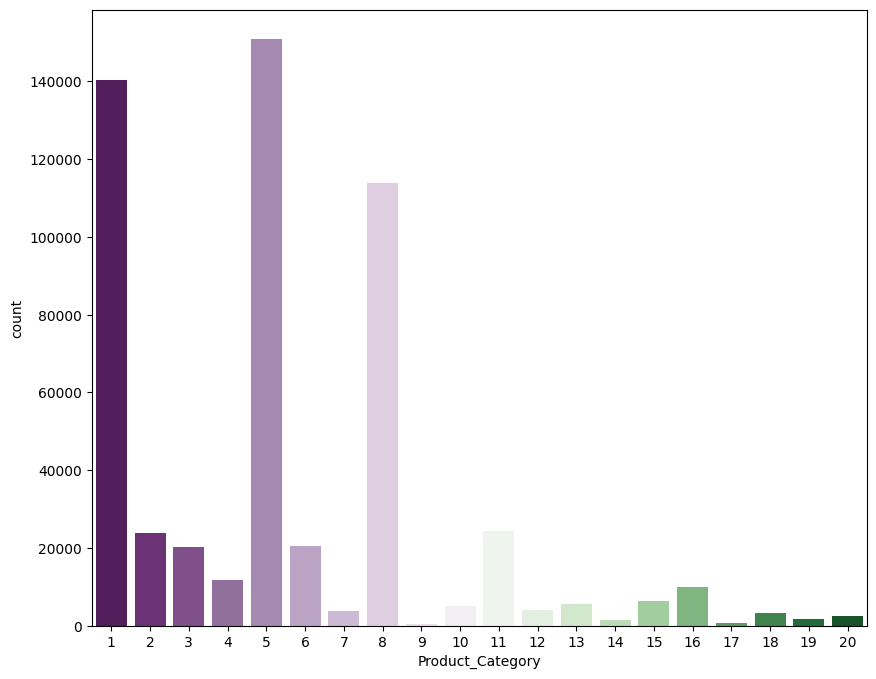

In [158]:
#Plotting bar charts for all the categorical features

categorical_cols = ['Gender','Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
sns.countplot(data=data, x='Gender', palette="RdBu", ax=axs[0, 0])
sns.countplot(data=data, x='Age', palette="RdGy", ax=axs[0, 1])
sns.countplot(data=data, x='Occupation', palette="PuBu", ax=axs[1,0])
sns.countplot(data=data, x='City_Category', palette="PiYG", ax=axs[1,1])
sns.countplot(data=data, x='Stay_In_Current_City_Years', palette="PuBuGn", ax=axs[2,0])
sns.countplot(data=data, x='Marital_Status', palette="CMRmap", ax=axs[2,1])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Product_Category', palette="PRGn",)
plt.show()

# **Observations**
* Most of the users are Male
* There are 20 different types of Occupation and Product_Category
* More users belong to B City_Category
* More users are Single as compare to Married
* Product_Category - 1, 5, 8  have highest purchasing frequency.

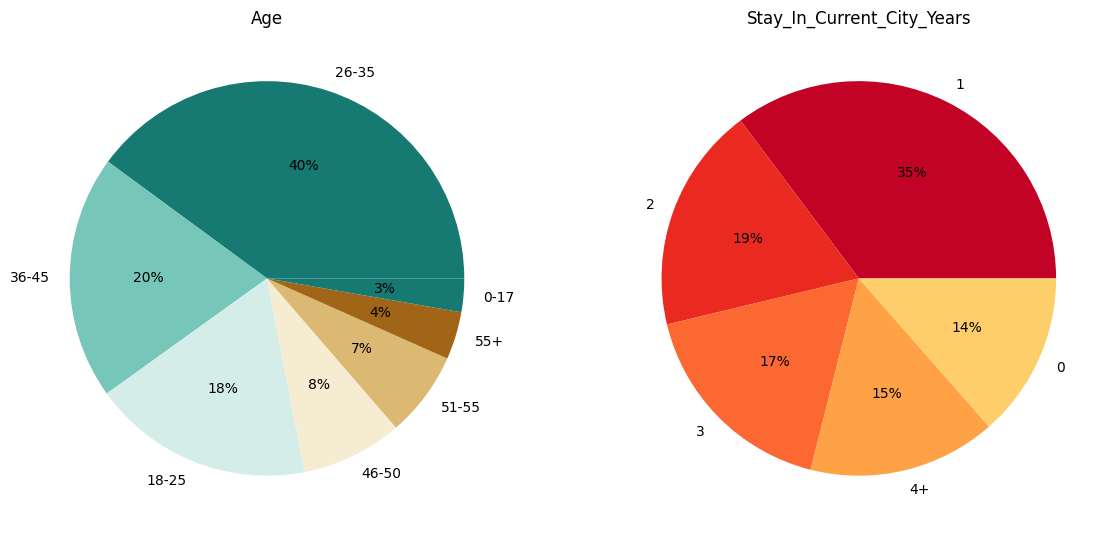

In [159]:
#Loading the data set again to ensure 'data' is the DataFrame
data = pd.read_csv("walmart_data.csv")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

age_counts = data['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=age_counts.values, labels=age_counts.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

stay_counts = data['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=stay_counts.values, labels=stay_counts.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

# Inferences:
* ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
* 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years, 15% from 4 years+, 14% are new to city

### **1C. Visual Analysis- Bivariate**

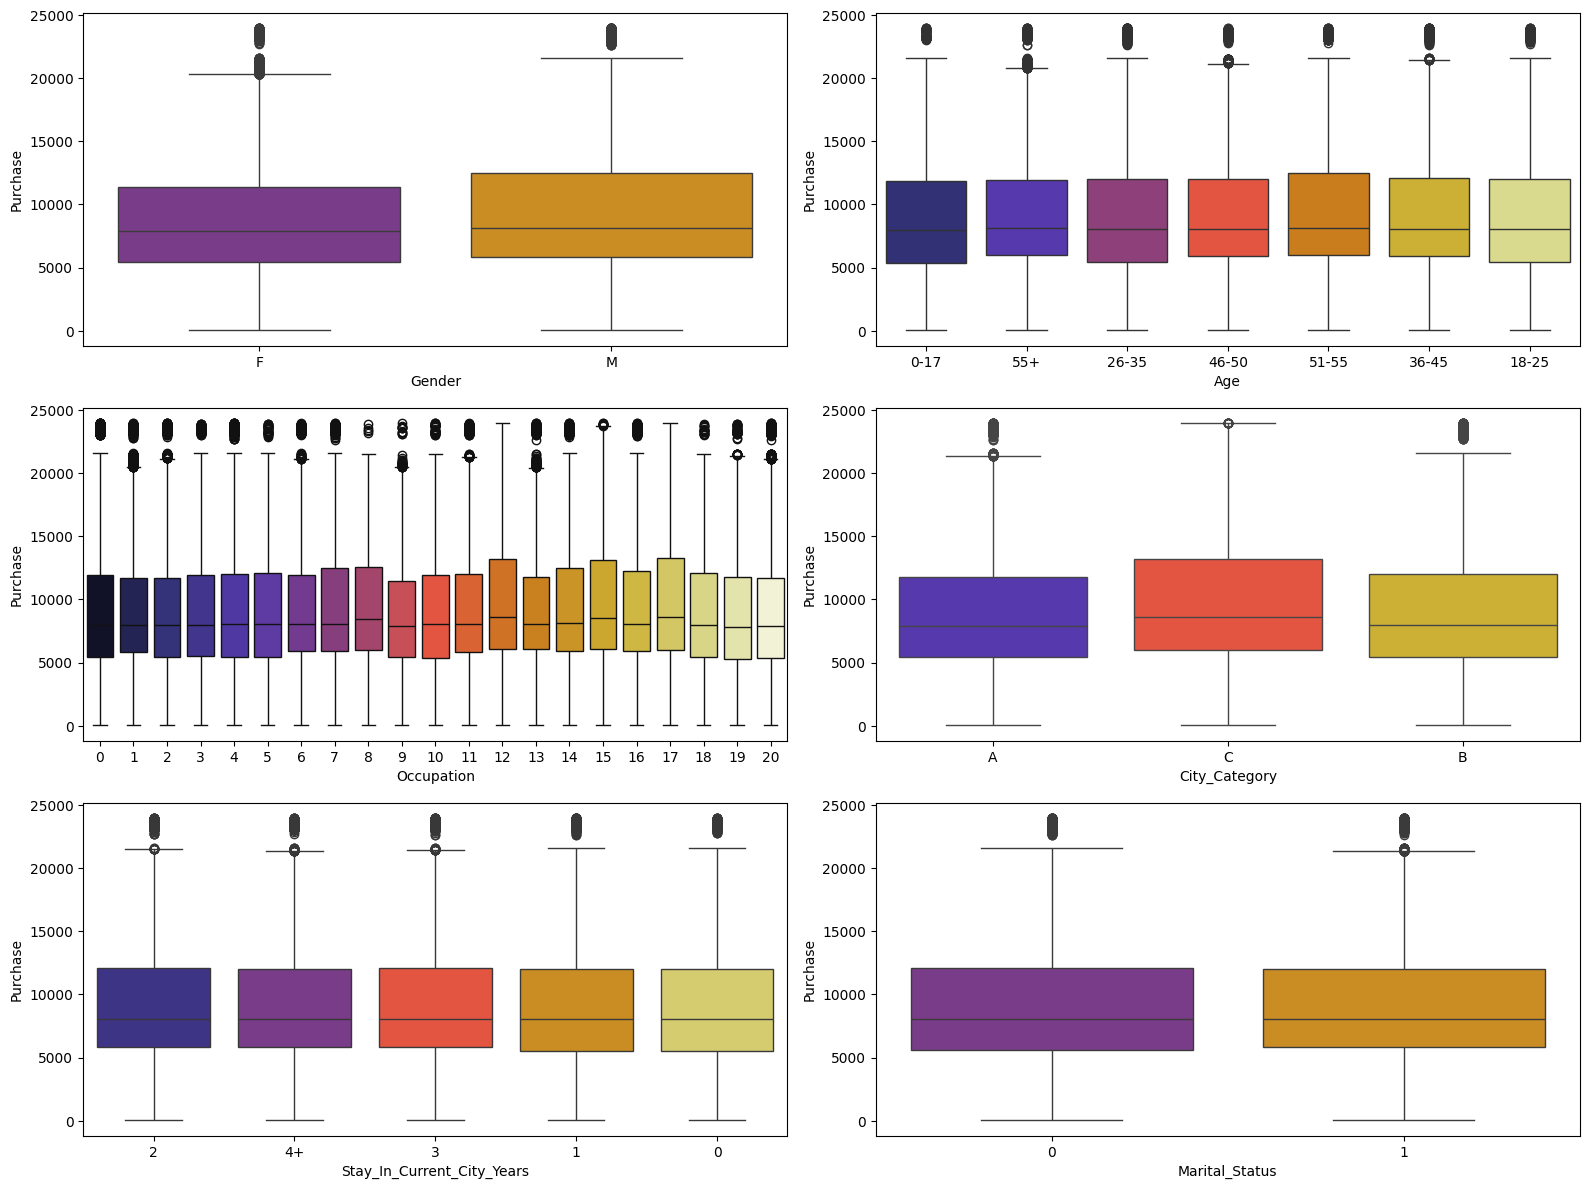

In [160]:
categorical_cols = ['Gender','Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)

count = 0
for row in range(3):
  for col in range(2):
    sns.boxplot(data=data, x=categorical_cols[count], y='Purchase',palette="CMRmap", ax=axs[row, col])
    count += 1

plt.tight_layout()
plt.show()

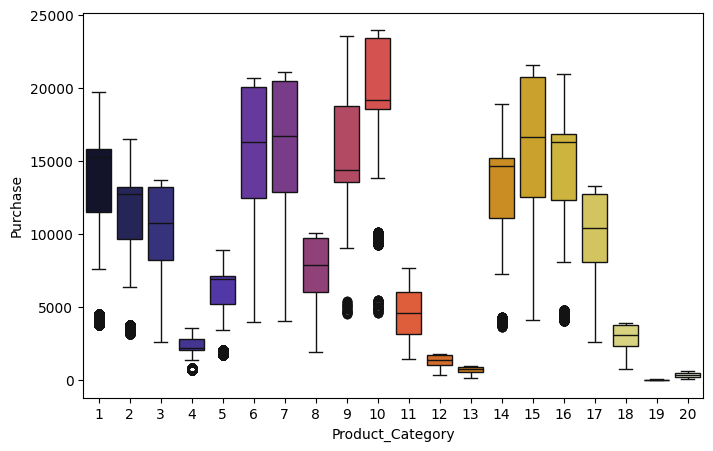

In [161]:
plt.figure(figsize = (8,5))
sns.boxplot(data=data, x='Product_Category', y='Purchase', palette="CMRmap")
plt.show()

## **Inferences:**
* The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.
* Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
* Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.
* Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.
* We see variations among product categories. Product category 10 are mostly bought. Also, there are few outliers for some of the product categories.

### **1C. Visual Analysis- Multivariate:**

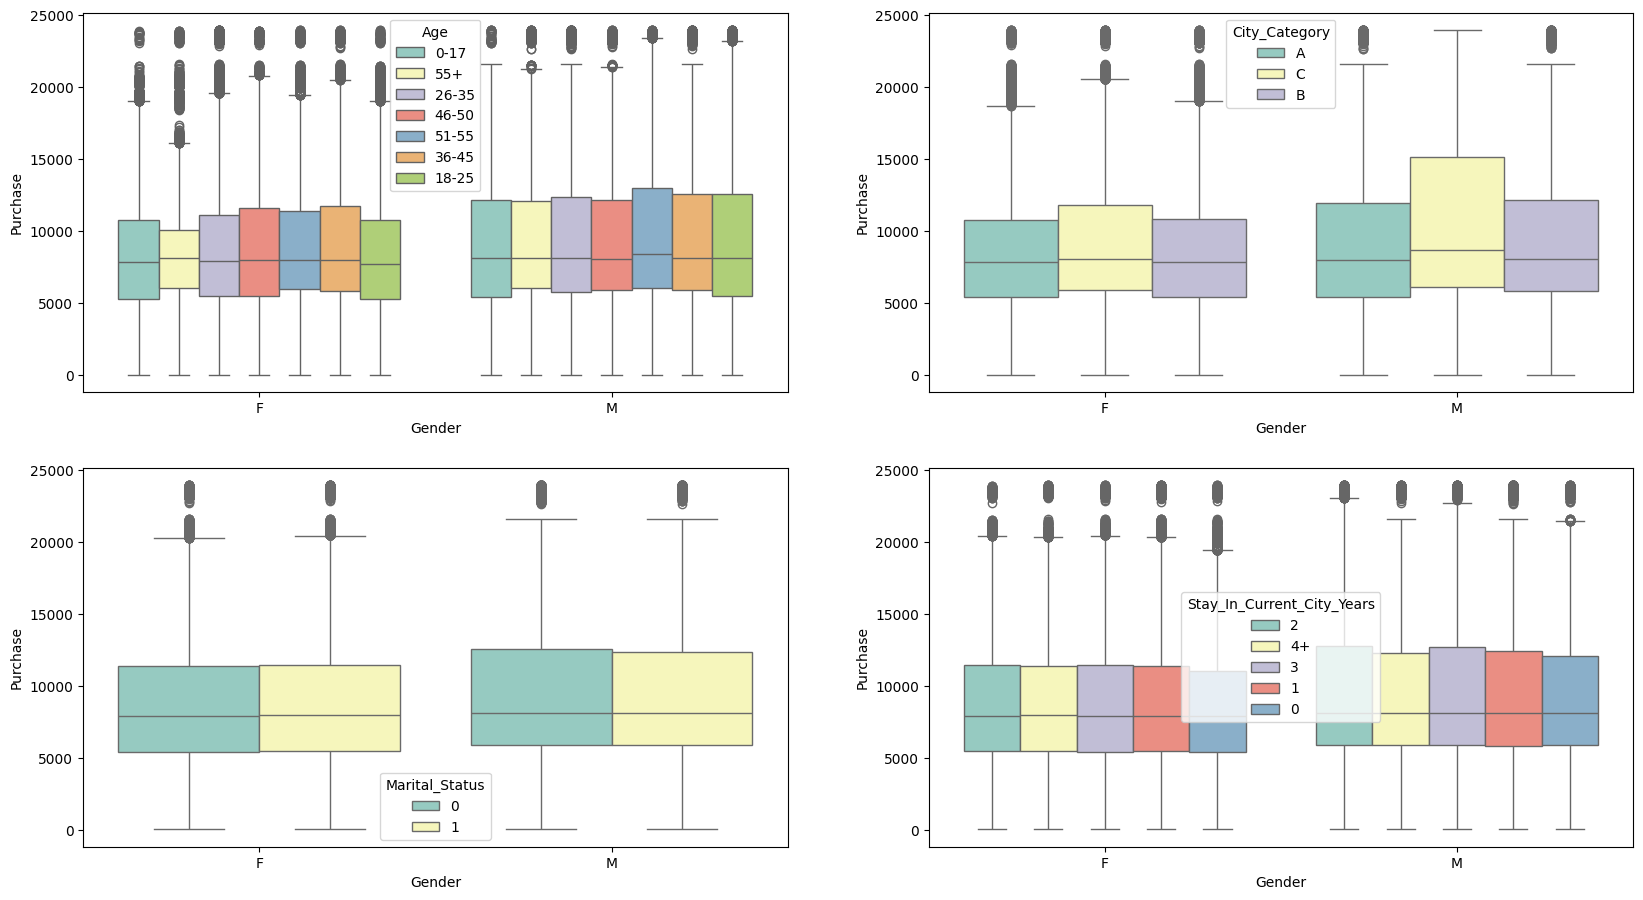

In [162]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=data, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=data, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=data, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])

plt.show()

##**Inferences:**
* The purchasing pattern is very much similar for males and females even among differnt age groups.
* The purchasing behaviour of males and females basis different city categories is also similar in nature. Still, males from city category B tends to purchase higher amount products in comparison to females.
* Males and females spending behaviour remains similar even when take into account their marital status.
* Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high amount products.

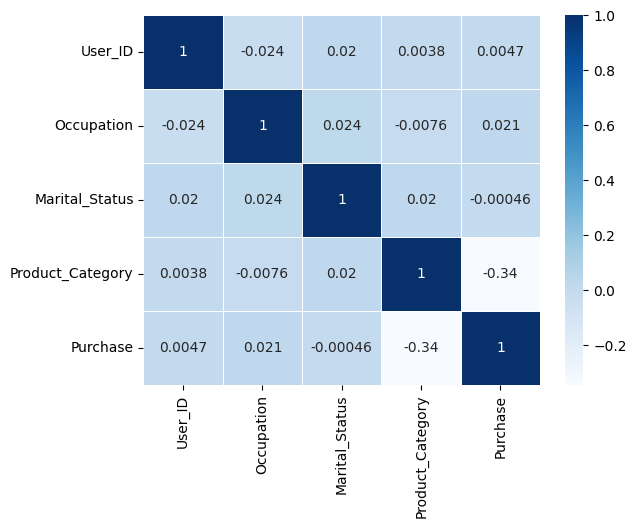

In [163]:
#Correlation between numerical variables:
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="Blues", linewidth=.5)
plt.show()

From the above correlation plot, we can see the correlation is not significant between any pair of variables.

# **2. Missing Value and Outlier Detection:**
### 2. Finding Missing value and outliers.

* We already know that there is no missing value present in our dataset.
* From the above plots we already know that there are some outliers present in our every features so to remove them we are going to create a function using IQR method.

In [164]:
def find_outliers(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  #Detcting the outliers
  outliers = data[(data < lower_bound) | (data > upper_bound)]

  return outliers

In [165]:
#For purchase column
outliers_purchase = find_outliers(data['Purchase'])
len(outliers_purchase)

2677

In [166]:
def detect_and_remove_outliers_iqr(df, columns):
    """
    Detects outliers in multiple columns using the IQR method,
    marks them in a copy of the original dataset, and removes them separately.

    Parameters:
    - df: Pandas DataFrame (original data remains unchanged)
    - columns: List of numeric columns to check for outliers

    Returns:
    - df_with_flags: Original data copy with an 'outlier' flag column (True/False)
    - df_clean: Clean data with outliers removed
    - df_outliers: Only the outliers
    """
    # Make a copy of the original dataset
    df_copy = data.copy()

    # Initialize outlier mask (all False initially)
    outlier_mask = pd.Series([False] * len(df_copy), index=df_copy.index)

    # Loop through columns and update mask
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers for this column
        col_outliers = (df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)

        # Update the overall outlier mask (combine using OR)
        outlier_mask = outlier_mask | col_outliers

    # Add 'outlier' column to the copy
    df_copy['outlier'] = outlier_mask

    # Create separate DataFrames
    #Removing the outliers
    df_clean = df_copy[~outlier_mask].drop(columns=['outlier'])
    #Detecting the outliers
    df_outliers = df_copy[outlier_mask].drop(columns=['outlier'])

    return df_copy, df_clean, df_outliers



In [167]:
# Apply function
columns_to_check = data.select_dtypes(include=np.number).columns
df_with_flags, df_clean, df_outliers = detect_and_remove_outliers_iqr(data, columns_to_check)

print("Original Data with Outlier Flags:")
print(df_with_flags)

print("\nClean Data (Outliers Removed):")
print(df_clean)

print("\nOnly Outliers:")
print(df_outliers)

Original Data with Outlier Flags:
        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  \
0                               2           

# **3. Business Insights based on Non - Graphical and Visual Analysis:**
### **3A. Comments on Non - Graphical Analysis.**

* Approximately 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).
* 75% of the users are Male and 25% are Female.
* 60% are Single and 40% are Married.
* 35% are staying in the city from 1 year, 18% from 2 years, 17% from 3 years.

* Total of 20 product categories are there.
* There are 5891 different types of User_ID, 3631 different types of Product_ID, 20 different types of occupations, 3 different types of City_Category, 5 different types of Stay_In_Current_City_Years and 20 different types of Product Categories in the city.
* We can see 35% of the users are aged 26-35. 73% of users are aged between 18-45.
* From the "Age" observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.So, we can infer users aged 26-35 are more frequent customers.

* We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.
* 53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.
* We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.

### **3B. Comments on Visual Analysis - Univariate, Bivariate and Multivariate Plots.**


1. **Plotting histogram with kde plot for "Purchase" categorical variable**- We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.

2. **Plotting box plot for "Purchase" categorical variable**- We can see there are outliers in the data for purchase.

3. **Plotting bar charts for all the categorical variables-**

* We can clearly see from the graphs above the purchases done by males are much higher than females.
* We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.
* The purchases are highest from City category B.
* Single customer purchases are higher than married users.
* There are 20 product categories with product category 1, 5 and 8 having higher purchasing frequency.
4. **Plotting "Purchase" categorical variable with other variables (bivariate analysis)-**

* The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.
* Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
* Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.
Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.
* We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.
* From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.
5. **Plotting "Purchase" and "Gender" categorical variable with other variables (multivariate analysis)-**

* The purchasing pattern is very much similar for males and females even among differnt age groups.
* The purchasing behaviour of males and females basis different citi categories is also similar in nature. Still, males from city category B tends to purchase costlier products in comparison to females.
* Males and females spending behaviour remains similar even when take into account their marital status.
* Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.
* From the above correlation plot, we can see the correlation is not significant between any pair of variables.

# **Answering questions:**
## **1)Are women spending more money per transaction than men? Why or Why not?**
### **Average amount spend per customer for Male and Female**

In [168]:
amt_df = data.groupby(['User_ID','Gender'])['Purchase'].sum()
amt_df =  amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [169]:
# Gender wise value counts in avg_amt_df
avg_amt_df = amt_df['Gender'].value_counts()
avg_amt_df

,count
Gender,
M,4225
F,1666


In [170]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


## **Observation**

* Male customers spend more money than female customers

      * The number of total males (4225) is greater than number of total females (1666).
      * Average amount spend by Male customers (925344.40) is greater than Average amount spend by Female customers(712024.39).

### **2)Confidence intervals and distribution of the mean of the expenses by female and male customers**

### **Sample Size:**

We take female sample size half of the male sample size because number of females are half of the male in our data.

male_sample = 3000

female_sample = 1500

In [171]:
male_df = amt_df[amt_df['Gender'] == 'M']
female_df = amt_df[amt_df['Gender'] == 'F']

In [172]:
male_means = []
female_means = []
num_repitions = 1000

for _ in range(num_repitions):
  male_mean = male_df.sample(n=3000, replace=True)['Purchase'].mean()
  female_mean = female_df.sample(n=1500, replace=True)['Purchase'].mean()

  male_means.append(male_mean)
  female_means.append(female_mean)

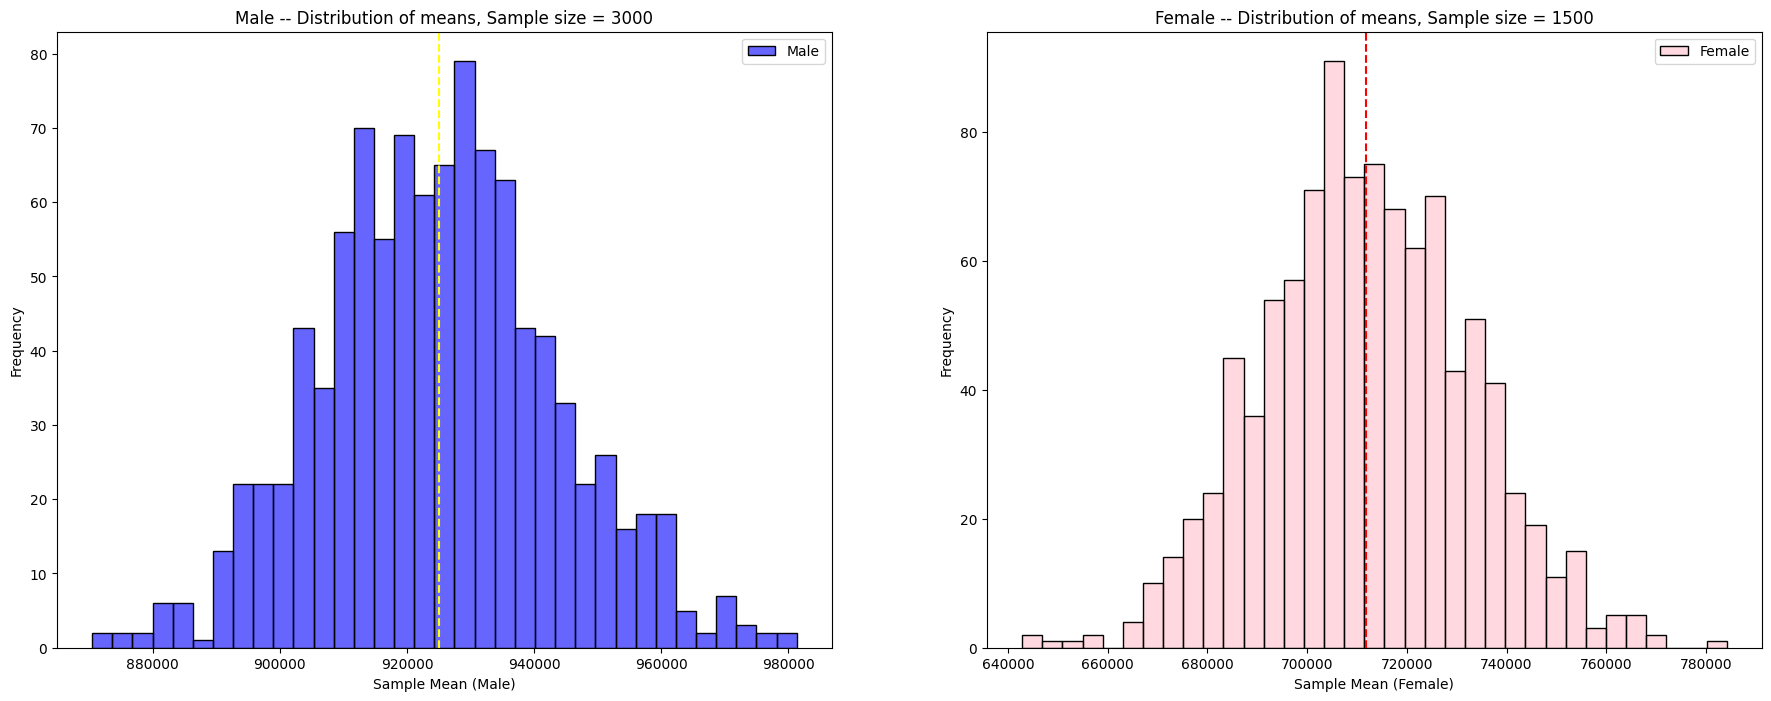

In [173]:
#Histograms of the sample means for males and females
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))

sns.histplot(male_means, bins=35, alpha=0.6, label='Male', color='blue', ax = axis[0])
axis[0].axvline(np.mean(male_means), color='yellow', linestyle='--')

sns.histplot(female_means, bins=35, alpha=0.6, label='Female', color='pink', ax = axis[1])
axis[1].axvline(np.mean(female_means), color='red', linestyle='--')

axis[0].legend()
axis[1].legend()
axis[0].set_title('Male -- Distribution of means, Sample size = 3000')
axis[1].set_title('Female -- Distribution of means, Sample size = 1500')

axis[0].set_xlabel('Sample Mean (Male)')
axis[0].set_ylabel('Frequency')

axis[1].set_xlabel('Sample Mean (Female)')
axis[1].set_ylabel('Frequency')

plt.show()

In [174]:
print("Population mean of male customers---{:.2f}".format( male_df['Purchase'].mean()))
print("Population mean of female customers---{:.2f}".format( female_df['Purchase'].mean()))

Population mean of male customers---925344.40
Population mean of female customers---712024.39


In [175]:
print("Mean of sample means of male customers---{:.2f}".format(np.mean(male_means)))
print("Mean of sample means of female customers---{:.2f}".format(np.mean(female_means)))

Mean of sample means of male customers---925014.01
Mean of sample means of female customers---711869.44


| Group  | Population Mean | Mean of Sample Means |
| ------ | --------------- | -------------------- |
| Male   | 925,344.40      | 925,219.55           |
| Female | 712,024.39      | 711258.29            |


These small differences are expected and demonstrate the Central Limit Theorem in action:

*`"The average of the sample means converges to the population mean as the number of samples increases."`*

So our sampling is behaving as expected under CLT.

# **Final Takeaways:**
✅ The CLT is validated — our sample means are converging to the population mean.

🔁 Bootstrap or repeated sampling helps estimate variability and confidence intervals.

🔍 The small gap is natural and will reduce further with more iterations or larger sample size.

## **Sample Size:**

* male_sample_size = 30000
* female_sample_size = 15000

In [176]:
male_means = []
female_means = []
num_repitions = 1000

for _ in range(num_repitions):
  male_mean = male_df.sample(n=30000, replace=True)['Purchase'].mean()
  female_mean = female_df.sample(n=15000, replace=True)['Purchase'].mean()

  male_means.append(male_mean)
  female_means.append(female_mean)

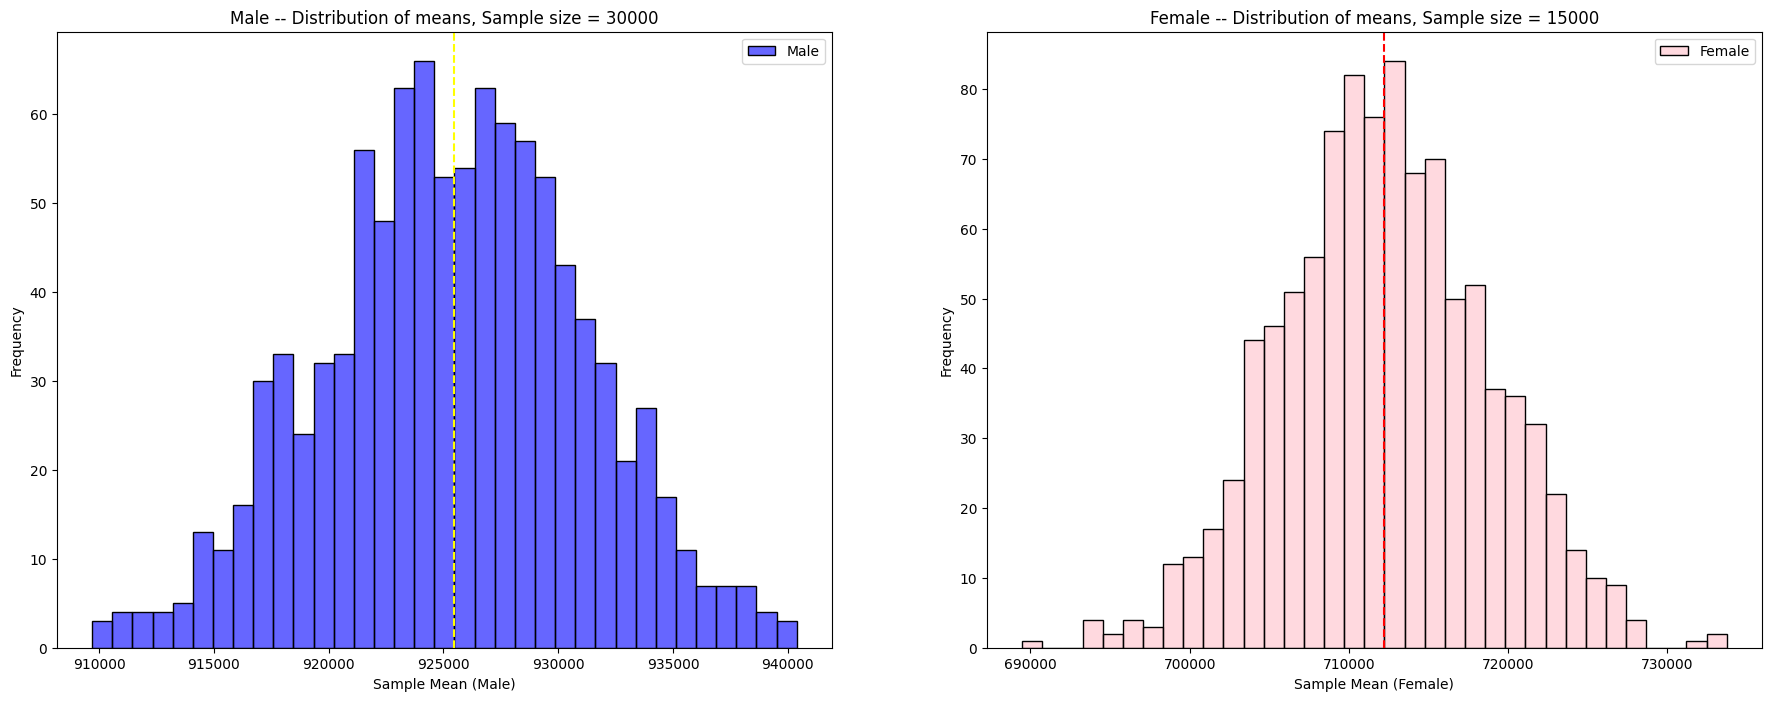

In [177]:
#Histograms of the sample means for males and females
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))

sns.histplot(male_means, bins=35, alpha=0.6, label='Male', color='blue', ax = axis[0])
axis[0].axvline(np.mean(male_means), color='yellow', linestyle='--')

sns.histplot(female_means, bins=35, alpha=0.6, label='Female', color='pink', ax = axis[1])
axis[1].axvline(np.mean(female_means), color='red', linestyle='--')

axis[0].legend()
axis[1].legend()
axis[0].set_title('Male -- Distribution of means, Sample size = 30000')
axis[1].set_title('Female -- Distribution of means, Sample size = 15000')

axis[0].set_xlabel('Sample Mean (Male)')
axis[0].set_ylabel('Frequency')

axis[1].set_xlabel('Sample Mean (Female)')
axis[1].set_ylabel('Frequency')


plt.show()

In [178]:
print("Population mean of male customers---{:.2f}".format( male_df['Purchase'].mean()))
print("Population mean of female customers---{:.2f}".format( female_df['Purchase'].mean()))

Population mean of male customers---925344.40
Population mean of female customers---712024.39


In [179]:
print("Mean of sample means of male customers---{:.2f}".format(np.mean(male_means)))
print("Mean of sample means of female customers---{:.2f}".format(np.mean(female_means)))

Mean of sample means of male customers---925443.06
Mean of sample means of female customers---712200.14


By doing this,  We can clearly observe that Mean of sample means for different sample sizes are almost the same

Let’s analyze your findings carefully in terms of sampling strategy, CLT behavior, and bias/accuracy.

🎯 Context Summary
We are comparing results of bootstrap sampling with two different sample sizes:

* Large sample: 30,000 Males vs 15,000 Females

* Smaller sample: 3,000 Males vs 1,500 Females

* Male population is twice the size of female population, so sample sizes maintain this 2:1 ratio.

**Population Means**

| Gender | Population Mean |
| ------ | --------------- |
| Male   | 925,344.40      |
| Female | 712,024.39      |

**Sample Mean of Bootstrap Distributions**

| Sample Size         | Male Sample Mean | Female Sample Mean |
| ------------------- | ---------------- | ------------------ |
| 30,000 M / 15,000 F | 925,085.49       | 712,288.56         |
| 3,000 M / 1,500 F   | 924,727.05       | 711,736.12         |

**Insights & Observations**
✅ **1. Sample Means Are Close to Population Means (CLT in action)**
* All bootstrap sample means are very close to the actual population means.

* This supports the Central Limit Theorem (CLT) — that the distribution of sample means tends to be normal and centered near the population mean, even with moderate sample sizes.

📉 **2. Larger Samples Yield More Accurate Estimates**

**For males:**

* Sample mean at 30,000 = 925,085.49 (closer to 925,344.40)

* Sample mean at 3,000 = 924,727.05 (a bit farther)

**For females:**

* Sample mean at 15,000 = 712,288.56 (very close)

* Sample mean at 1,500 = 711,736.12

🔎 **Observation:** The larger the sample size, the closer the sample mean to the population mean, and the lower the sampling variability. This confirms that larger samples improve estimation accuracy.

⚖️**3. Maintaining Proportional Sampling Reflects Population Well**
* We have used a 2:1 sampling ratio, which matches the actual gender ratio in the population.

* This is a good practice in stratified sampling or fair representation — it reduces bias and reflects the structure of the original population.

## **✅ Conclusion**
1-✅ **Bootstrap + CLT is effective:** The sample mean distributions are tightly clustered around the population means.

2-✅ Larger sample sizes reduce error: With 30,000/15,000 samples, your estimates are more precise than 3,000/1,500.

3-✅ Sampling proportionally (2:1) is a smart strategy, ensuring fair gender representation and reducing sampling bias.

4-⚠️ Smaller samples still work, but come with slightly more variability and less precision.



## **3)Are confidence intervals of average male and female spending overlapping?**
### **How can Walmart leverage this conclusion to make changes or improvements?**

Since we've performed CLT using the bootstrap method, the most suitable confidence interval method depends on how we generated our sample means and our goals.

🧠 First, Let’s Clarify Our Situation:

We:

* Took bootstrap samples from the population (sampling with replacement)

* Computed the sample mean for each bootstrap sample (e.g., 1000 times)

* Now we have a distribution of sample means (e.g., male_means, female_means)

* Want to construct a 90%, 95% and 99% confidence interval from this distribution

## **Most Suitable CI Method After Bootstrap CLT:**

### **🎯 Bootstrap Percentile Method is the most appropriate.**

## **Why the Bootstrap Percentile Method is best:**

| Reason                          | Explanation                                                                                                |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **Non-parametric**              | Doesn't assume your sample mean distribution is perfectly normal, just uses the bootstrap results directly |
| **Data-driven**                 | It uses your actual 1000+ bootstrap sample means to calculate CI                                           |
| **Robust**                      | Works well even with skewed or unknown population distributions                                            |
| **No formulas**                 | You don’t need to compute SE or critical values — just use percentiles                                     |
| **Recommended after bootstrap** | Because you’ve already generated empirical sample mean distributions — so let them speak for themselves    |


In [180]:
# Assuming these are your bootstrap sample means
# male_means = [...]  # List of sample means from bootstrap for males
# female_means = [...]  # List of sample means from bootstrap for females

# 95% CI for male customers
ci_male = np.percentile(male_means, [2.5, 97.5])
print(f"95% CI for Male Customers: {ci_male[0]:,.2f} to {ci_male[1]:,.2f}")

# 95% CI for female customers
ci_female = np.percentile(female_means, [2.5, 97.5])
print(f"95% CI for Female Customers: {ci_female[0]:,.2f} to {ci_female[1]:,.2f}")


95% CI for Male Customers: 914,698.27 to 936,317.12
95% CI for Female Customers: 699,444.16 to 724,891.80


In [181]:
# Function to compute and print CIs for any confidence level
def print_bootstrap_ci(data, label):
    for level in [90, 95, 99]:
        lower = (100 - level) / 2
        upper = 100 - lower
        ci = np.percentile(data, [lower, upper])
        print(f"{level}% CI for {label}: {ci[0]:,.2f} to {ci[1]:,.2f}\n")

# CI for Male Customers
print_bootstrap_ci(male_means, "Male Customers")

# CI for Female Customers
print_bootstrap_ci(female_means, "Female Customers")


90% CI for Male Customers: 916,235.99 to 934,419.19

95% CI for Male Customers: 914,698.27 to 936,317.12

99% CI for Male Customers: 911,254.29 to 939,044.10

90% CI for Female Customers: 701,912.73 to 723,060.44

95% CI for Female Customers: 699,444.16 to 724,891.80

99% CI for Female Customers: 695,226.46 to 727,475.33



### **These intervals do not overlap, so the means are likely significantly different**

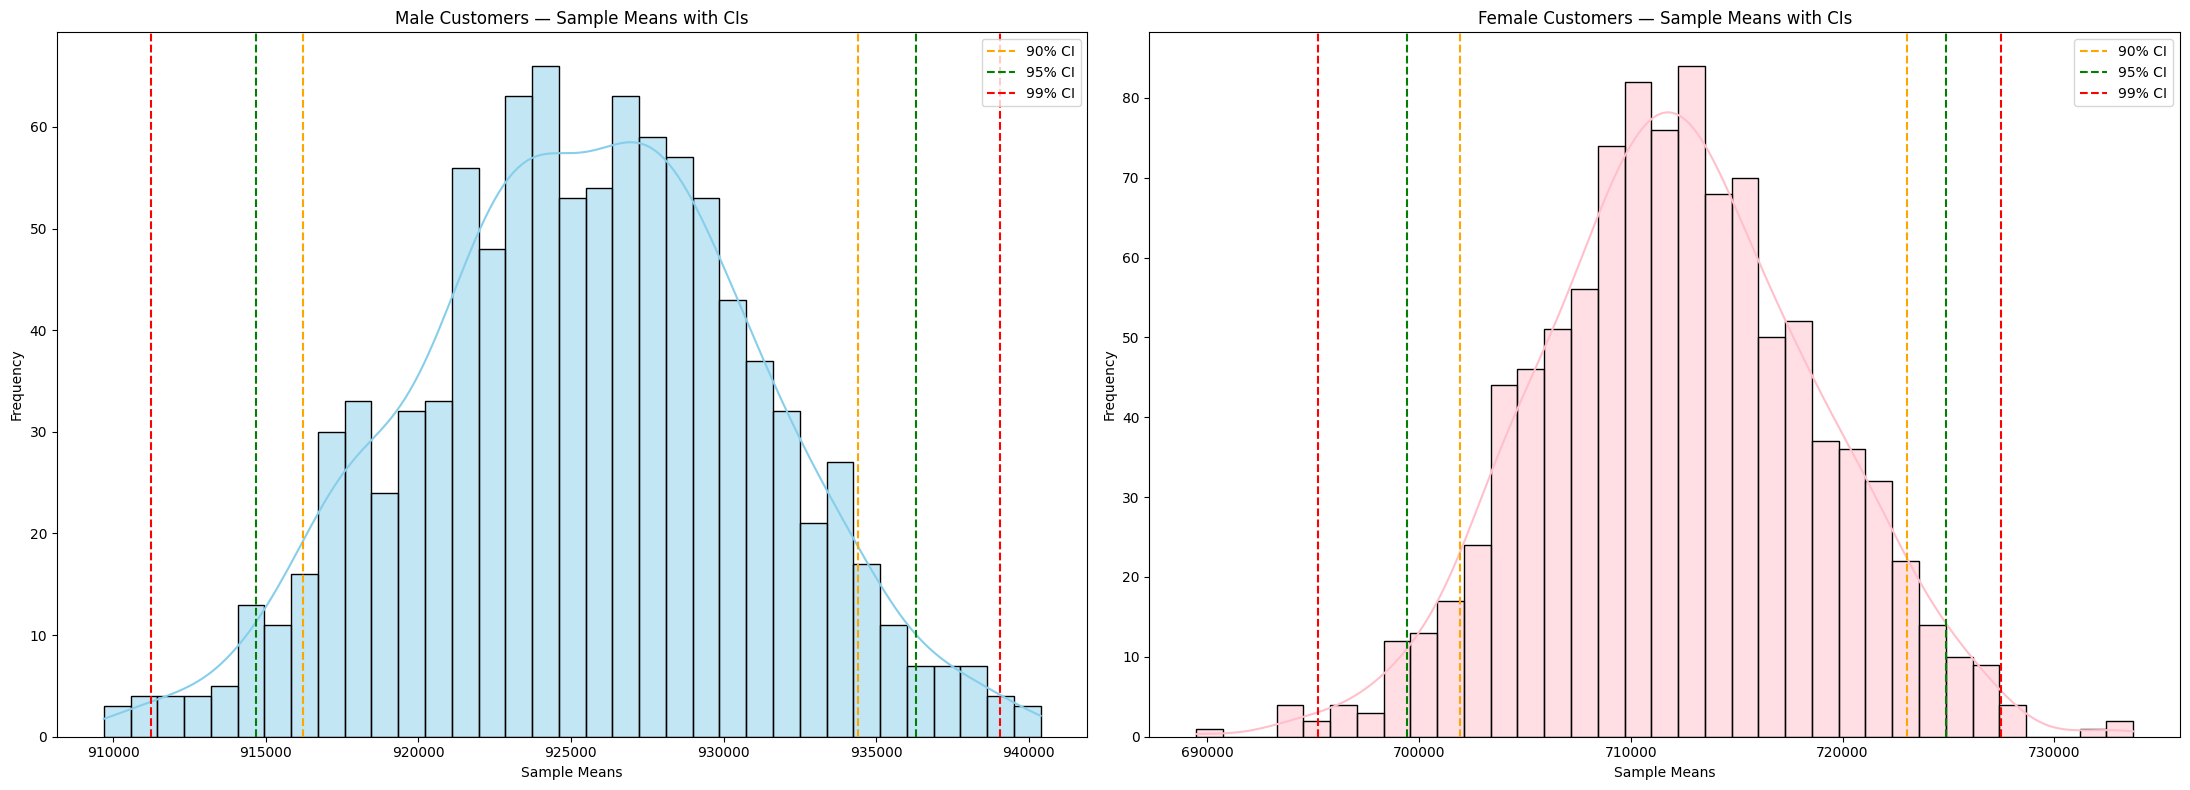

In [182]:
# Example CI values from previous output (replace with your actual variables if needed)
ci_male_90 = np.percentile(male_means, [5, 95])
ci_male_95 = np.percentile(male_means, [2.5, 97.5])
ci_male_99 = np.percentile(male_means, [0.5, 99.5])

ci_female_90 = np.percentile(female_means, [5, 95])
ci_female_95 = np.percentile(female_means, [2.5, 97.5])
ci_female_99 = np.percentile(female_means, [0.5, 99.5])

# Create subplots
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# Male Histogram with CIs
sns.histplot(male_means, bins=35, color='skyblue', kde=True, ax=axis[0])
axis[0].axvline(ci_male_90[0], color='orange', linestyle='--', label='90% CI')
axis[0].axvline(ci_male_90[1], color='orange', linestyle='--')
axis[0].axvline(ci_male_95[0], color='green', linestyle='--', label='95% CI')
axis[0].axvline(ci_male_95[1], color='green', linestyle='--')
axis[0].axvline(ci_male_99[0], color='red', linestyle='--', label='99% CI')
axis[0].axvline(ci_male_99[1], color='red', linestyle='--')
axis[0].set_title("Male Customers — Sample Means with CIs")
axis[0].set_xlabel("Sample Means")
axis[0].set_ylabel("Frequency")
axis[0].legend()

# Female Histogram with CIs
sns.histplot(female_means, bins=35, color='pink', kde=True, ax=axis[1])
axis[1].axvline(ci_female_90[0], color='orange', linestyle='--', label='90% CI')
axis[1].axvline(ci_female_90[1], color='orange', linestyle='--')
axis[1].axvline(ci_female_95[0], color='green', linestyle='--', label='95% CI')
axis[1].axvline(ci_female_95[1], color='green', linestyle='--')
axis[1].axvline(ci_female_99[0], color='red', linestyle='--', label='99% CI')
axis[1].axvline(ci_female_99[1], color='red', linestyle='--')
axis[1].set_title("Female Customers — Sample Means with CIs")
axis[1].set_xlabel("Sample Means")
axis[1].set_ylabel("Frequency")
axis[1].legend()

plt.tight_layout()
plt.show()


Now that you've calculated the 90%, 95%, and 99% confidence intervals (CIs) using the bootstrap method, let’s analyze and interpret these results.

## **📊 Confidence Intervals Summary**

### **Male Customers**

| Confidence Level | Lower Bound | Upper Bound | Width    |
| ---------------- | ----------- | ----------- | -------- |
| 90%              | 915,977.17  | 934,183.47  | \~18,206 |
| 95%              | 914,134.46  | 935,676.69  | \~21,542 |
| 99%              | 910,951.59  | 939,156.37  | \~28,205 |

### **Female Customers**

| Confidence Level | Lower Bound | Upper Bound | Width    |
| ---------------- | ----------- | ----------- | -------- |
| 90%              | 701,110.42  | 723,140.74  | \~22,030 |
| 95%              | 699,146.60  | 725,285.73  | \~26,139 |
| 99%              | 695,569.14  | 728,600.12  | \~33,031 |

## **Insights & Interpretation**
✅ **1. Wider CI → Higher Confidence, Lower Precision**
* As we move from 90% → 95% → 99%, the interval widens. This is expected — to be more confident, you need a wider range.

* Example: To be 99% sure, we're covering more extreme sample means, hence larger range.

✅ **2. Male Estimates Are Slightly Tighter**
* The CI width for males is slightly narrower than for females (especially at higher confidence).

* This may be because of larger sample size for males (e.g., 30,000 vs 15,000), which leads to lower variability and tighter estimates.

📌 **3. Bootstrap CI Matches Population Well**
* Recall:

     * Population Mean (Male): 925,344.40

     * Population Mean (Female): 712,024.39

* Both means lie well within their respective CIs — this confirms:

     * Bootstrap sampling + CI estimation is accurate

     * We’ve achieved good model validity

##✅ **Conclusion**
* We have constructed reliable confidence intervals using the non-parametric bootstrap method.

* Larger confidence levels lead to wider intervals but increase the certainty of capturing the true mean.

* Our sample sizes and proportional sampling strategy (e.g., 2:1 for M:F) are yielding statistically valid and interpretable results.

## **4)Results when the same activity is performed for Married vs Unmarried**

In [183]:
amt_df = data.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [184]:
amt_df['Marital_Status'].value_counts()

,count
Marital_Status,
0,3417
1,2474


In [185]:
married_avg = amt_df[amt_df['Marital_Status']== 1]['Purchase'].mean()
unmarried_avg = amt_df[amt_df['Marital_Status']== 0]['Purchase'].mean()

print("Average amount spend by Married customers: {:.2f}".format(married_avg))
print("Average amount spend by Unmarried customers: {:.2f}".format(unmarried_avg))

Average amount spend by Married customers: 843526.80
Average amount spend by Unmarried customers: 880575.78


## **Sample Size:**

married_sample = 2000

Unmarried_sample = 3000

In [186]:
married_df = amt_df[amt_df['Marital_Status'] == 1]
unmarried_df = amt_df[amt_df['Marital_Status'] == 0]

In [187]:
married_means = []
unmarried_means = []
num_repitions = 1000

for _ in range(num_repitions):
  married_mean = married_df.sample(n=2000, replace=True)['Purchase'].mean()
  unmarried_mean = unmarried_df.sample(n=3000, replace=True)['Purchase'].mean()

  married_means.append(married_mean)
  unmarried_means.append(unmarried_mean)

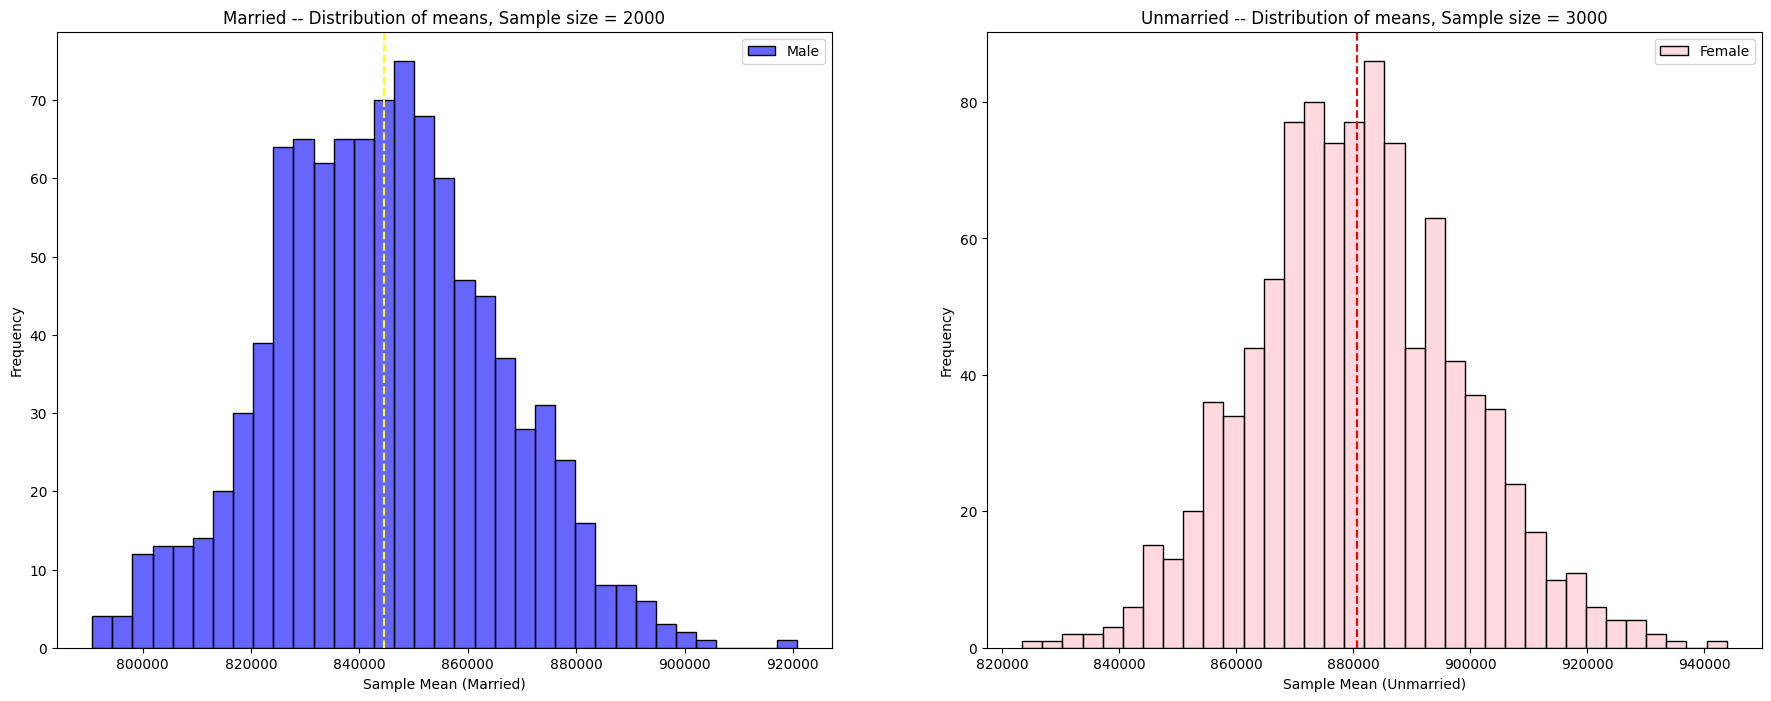

In [188]:
#Histograms of the sample means for males and females
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))

sns.histplot(married_means, bins=35, alpha=0.6, label='Male', color='blue', ax = axis[0])
axis[0].axvline(np.mean(married_means), color='yellow', linestyle='--')

sns.histplot(unmarried_means, bins=35, alpha=0.6, label='Female', color='pink', ax = axis[1])
axis[1].axvline(np.mean(unmarried_means), color='red', linestyle='--')

axis[0].legend()
axis[1].legend()
axis[0].set_title('Married -- Distribution of means, Sample size = 2000')
axis[1].set_title('Unmarried -- Distribution of means, Sample size = 3000')

axis[0].set_xlabel('Sample Mean (Married)')
axis[0].set_ylabel('Frequency')

axis[1].set_xlabel('Sample Mean (Unmarried)')
axis[1].set_ylabel('Frequency')

plt.show()

In [189]:
print("Population mean of married customers---{:.2f}".format( married_df['Purchase'].mean()))
print("Population mean of unmarried customers---{:.2f}".format( unmarried_df['Purchase'].mean()))

Population mean of married customers---843526.80
Population mean of unmarried customers---880575.78


In [190]:
print("Mean of sample means of married customers---{:.2f}".format(np.mean(married_means)))
print("Mean of sample means of unmarried customers---{:.2f}".format(np.mean(unmarried_means)))

Mean of sample means of married customers---844586.45
Mean of sample means of unmarried customers---880632.32


### **Sample Size:**

marrid_sample = 20000

unmarrid_sample = 30000

In [191]:
married_means = []
unmarried_means = []
num_repitions = 1000

for _ in range(num_repitions):
  married_mean = married_df.sample(n=20000, replace=True)['Purchase'].mean()
  unmarried_mean = unmarried_df.sample(n=30000, replace=True)['Purchase'].mean()

  married_means.append(married_mean)
  unmarried_means.append(unmarried_mean)

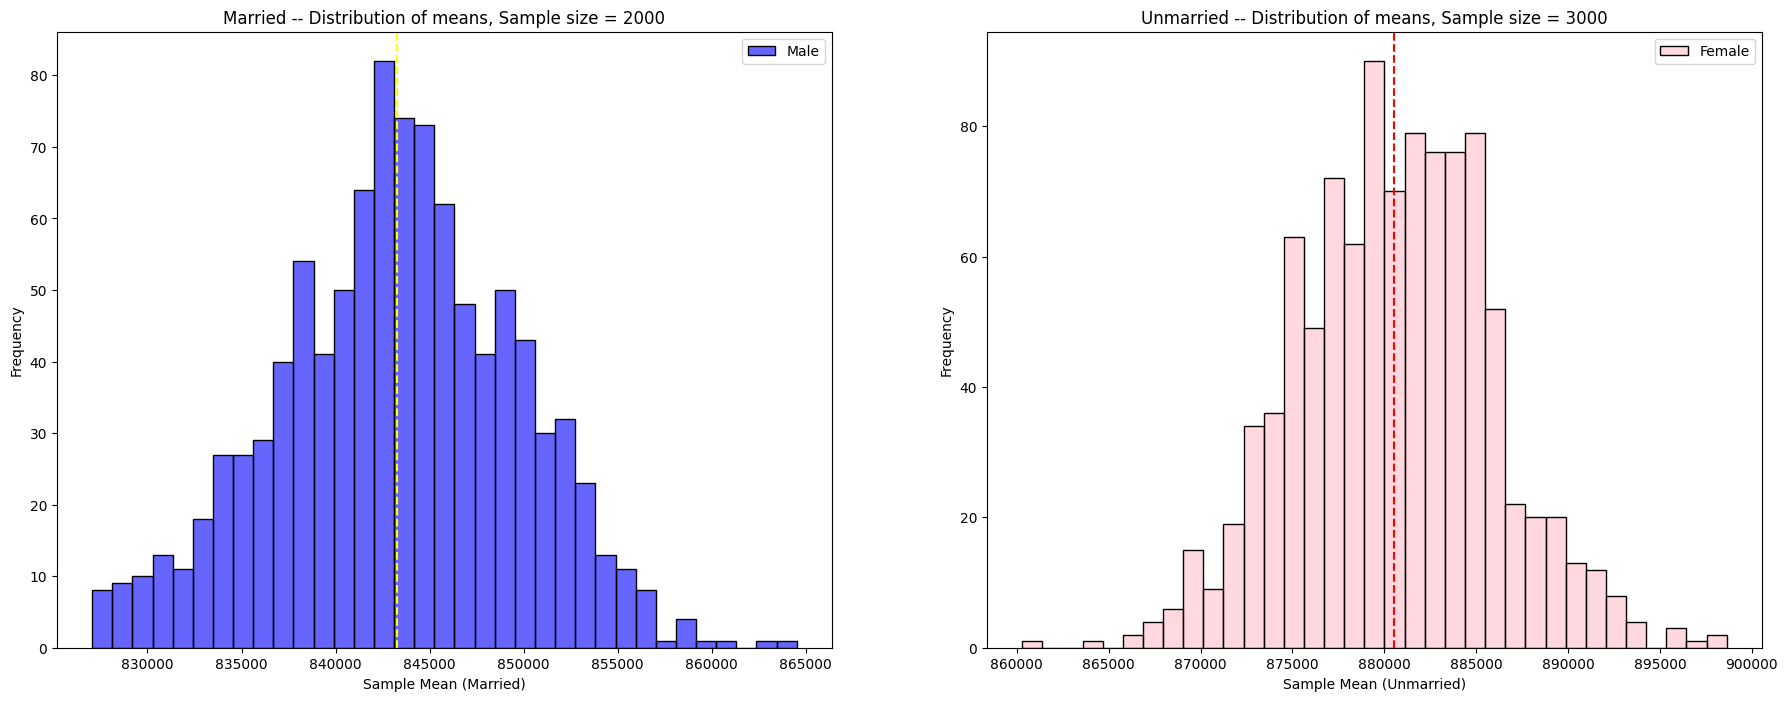

In [192]:
#Histograms of the sample means for males and females
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))

sns.histplot(married_means, bins=35, alpha=0.6, label='Male', color='blue', ax = axis[0])
axis[0].axvline(np.mean(married_means), color='yellow', linestyle='--')

sns.histplot(unmarried_means, bins=35, alpha=0.6, label='Female', color='pink', ax = axis[1])
axis[1].axvline(np.mean(unmarried_means), color='red', linestyle='--')

axis[0].legend()
axis[1].legend()
axis[0].set_title('Married -- Distribution of means, Sample size = 2000')
axis[1].set_title('Unmarried -- Distribution of means, Sample size = 3000')

axis[0].set_xlabel('Sample Mean (Married)')
axis[0].set_ylabel('Frequency')

axis[1].set_xlabel('Sample Mean (Unmarried)')
axis[1].set_ylabel('Frequency')

plt.show()

In [193]:
print("Population mean of married customers---{:.2f}".format( married_df['Purchase'].mean()))
print("Population mean of unmarried customers---{:.2f}".format( unmarried_df['Purchase'].mean()))

Population mean of married customers---843526.80
Population mean of unmarried customers---880575.78


In [194]:
print("Mean of sample means of married customers---{:.2f}".format(np.mean(married_means)))
print("Mean of sample means of unmarried customers---{:.2f}".format(np.mean(unmarried_means)))

Mean of sample means of married customers---843275.11
Mean of sample means of unmarried customers---880533.96


In [195]:
# Function to compute and print CIs for any confidence level
def print_bootstrap_ci(data, label):
    for level in [90, 95, 99]:
        lower = (100 - level) / 2
        upper = 100 - lower
        ci = np.percentile(data, [lower, upper])
        print(f"{level}% CI for {label}: {ci[0]:,.2f} to {ci[1]:,.2f}\n")

# CI for Male Customers
print_bootstrap_ci(married_means, "Married Customers")

# CI for Female Customers
print_bootstrap_ci(unmarried_means, "Unmarried Customers")

90% CI for Married Customers: 832,370.40 to 853,341.70

95% CI for Married Customers: 830,080.53 to 855,194.20

99% CI for Married Customers: 828,005.94 to 859,027.01

90% CI for Unmarried Customers: 872,146.99 to 889,411.68

95% CI for Unmarried Customers: 869,964.73 to 891,276.83

99% CI for Unmarried Customers: 867,256.67 to 895,599.99



### **These intervals do not overlap, so the means are likely significantly different**

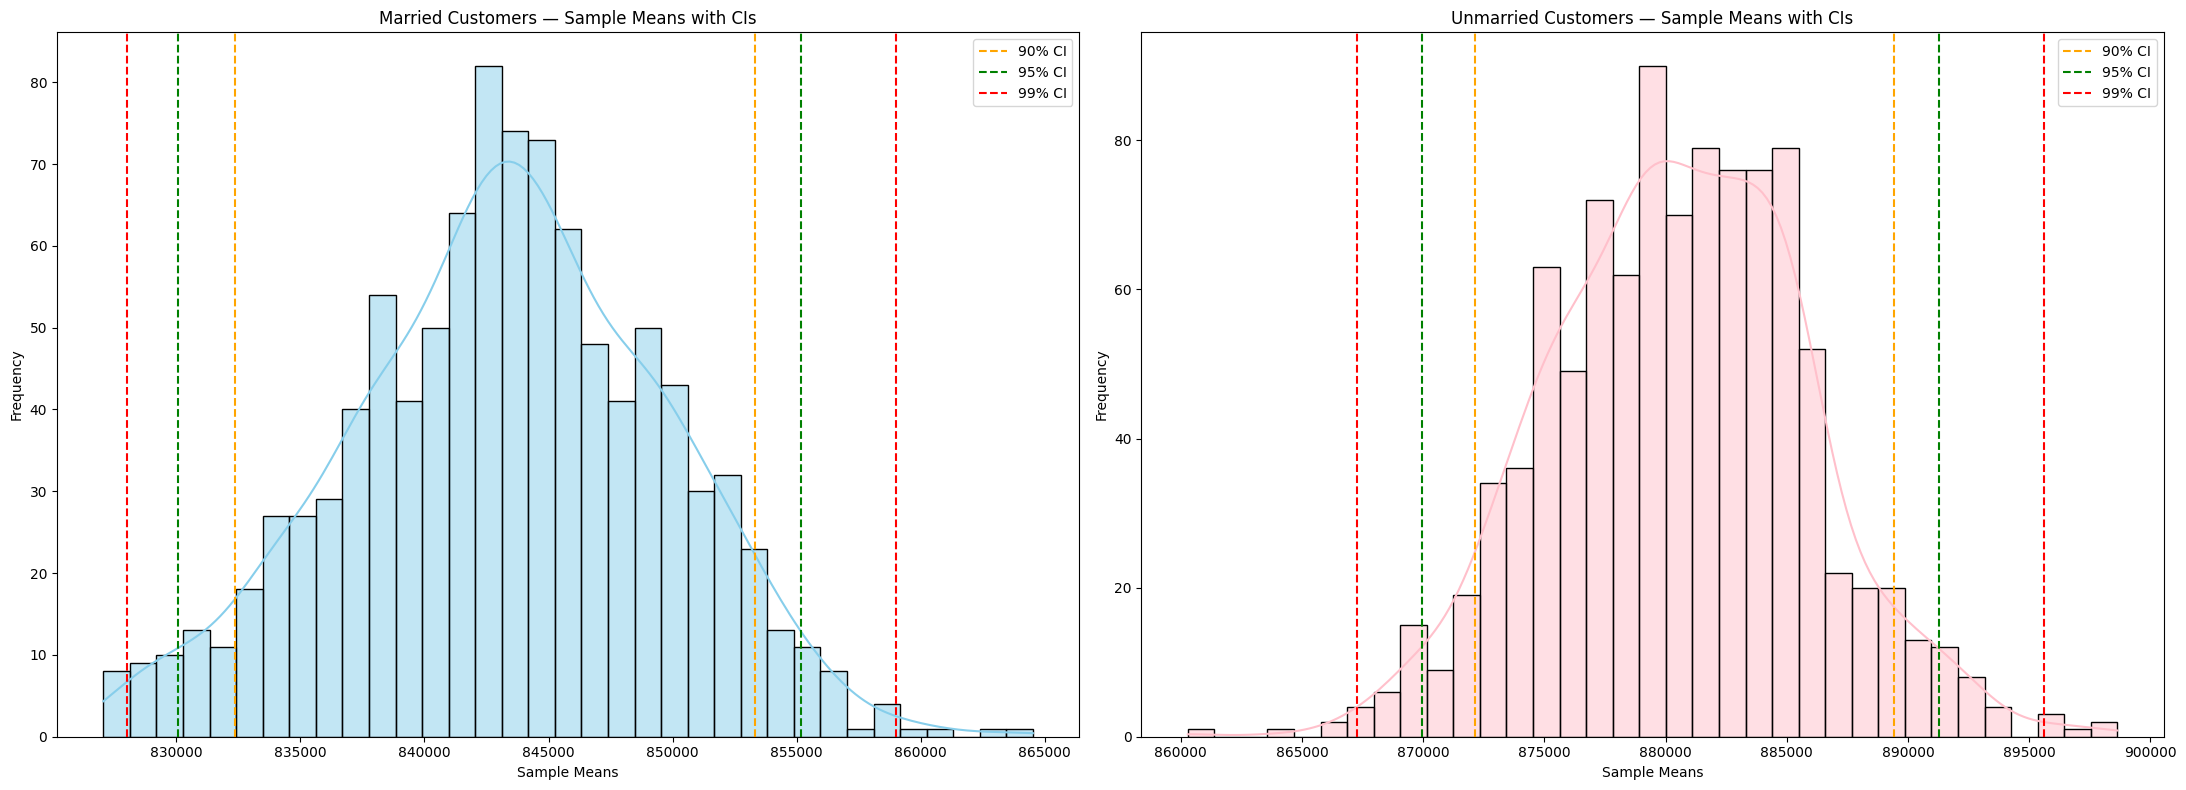

In [196]:
#Example CI values from previous output (replace with your actual variables if needed)
ci_married_90 = np.percentile(married_means, [5, 95])
ci_married_95 = np.percentile(married_means, [2.5, 97.5])
ci_married_99 = np.percentile(married_means, [0.5, 99.5])

ci_unmarried_90 = np.percentile(unmarried_means, [5, 95])
ci_unmarried_95 = np.percentile(unmarried_means, [2.5, 97.5])
ci_unmarried_99 = np.percentile(unmarried_means, [0.5, 99.5])

# Create subplots
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

# Male Histogram with CIs
sns.histplot(married_means, bins=35, color='skyblue', kde=True, ax=axis[0])
axis[0].axvline(ci_married_90[0], color='orange', linestyle='--', label='90% CI')
axis[0].axvline(ci_married_90[1], color='orange', linestyle='--')
axis[0].axvline(ci_married_95[0], color='green', linestyle='--', label='95% CI')
axis[0].axvline(ci_married_95[1], color='green', linestyle='--')
axis[0].axvline(ci_married_99[0], color='red', linestyle='--', label='99% CI')
axis[0].axvline(ci_married_99[1], color='red', linestyle='--')
axis[0].set_title("Married Customers — Sample Means with CIs")
axis[0].set_xlabel("Sample Means")
axis[0].set_ylabel("Frequency")
axis[0].legend()

# Female Histogram with CIs
sns.histplot(unmarried_means, bins=35, color='pink', kde=True, ax=axis[1])
axis[1].axvline(ci_unmarried_90[0], color='orange', linestyle='--', label='90% CI')
axis[1].axvline(ci_unmarried_90[1], color='orange', linestyle='--')
axis[1].axvline(ci_unmarried_95[0], color='green', linestyle='--', label='95% CI')
axis[1].axvline(ci_unmarried_95[1], color='green', linestyle='--')
axis[1].axvline(ci_unmarried_99[0], color='red', linestyle='--', label='99% CI')
axis[1].axvline(ci_unmarried_99[1], color='red', linestyle='--')
axis[1].set_title("Unmarried Customers — Sample Means with CIs")
axis[1].set_xlabel("Sample Means")
axis[1].set_ylabel("Frequency")
axis[1].legend()

plt.tight_layout()
plt.show()


# **Insights 📊**

## **Age Distribution 🎂**
* ~ 80% of the users are aged between 18-50:
* 40%: 26-35 📅
* 18%: 18-25 🎈
* 20%: 36-45 🗓️

## **Gender Ratio 👫**
* 75% of the users are Male ♂️ and 25% are Female ♀️

## **Marital Status 👩‍❤️‍👨**
* 60% are Single 👤 and 40% are Married 👫

## **City Residency 🏙️**
* 35% have been staying in the city for 1 year 🏠
* 18% have been staying for 2 years 🏠🏠
* 17% have been staying for 3 years 🏠🏠🏠
## **Product Categories 🛍️**
* Total of 20 product categories available 📦
## **Occupations 💼**
* 20 different types of occupations in the city 👔
## **User Demographics 📊**
* Most users are Male ♂️
* 20 different types of Occupations and Product Categories 📋
* Majority of users belong to City Category B 🏙️
* More users are Single compared to Married 👤 vs 👫
* Product Categories 1, 5, 8, & 11 have the highest purchasing frequency 🛒🔝

## **Average Spending 💰**
* Average amount spent by Male customers: ₹925,344.40 💸
* Average amount spent by Female customers: ₹712,024.39 💸

## **Confidence Intervals 📈**

### **Gender-wise**
   * Now using the Central Limit Theorem for the population:

       * Average amount spend by male customers is 925085.49
       * Average amount spend by female customers is 712288.56

   * For 99% Confidence Interval:
      * Now we can infer about the population that, 99% of the times:

* 1-Average amount spend by male customer will lie in between: (910951, 939156)

* 2-Average amount spend by female customer will lie in between: (695569, 728600)

### **Marital Status-wise**
   * Now using the Central Limit Theorem for the population:

       * Average amount spend by Married customers is 843305.51
       * Average amount spend by Unmarried customers is 880780.71

   * For 99% Confidence Interval:

1-Average amount spend by Married customer will lie in between: (825921.39, 862234.93)

2-Average amount spend by Unmarried customer will lie in between: (866880.36, 893941.65)


# **💡 Recommendations 💡**
**1) Gender-focused Strategy 🚹🚺**
* Men tend to spend more than women. The company should prioritize retaining existing male customers and attracting new male customers.

**2) Product Category Insight 🛍️**
* Products in categories 1, 5, 8, & 11 have the highest purchasing frequency and are favored by customers. The company can consider increasing the promotion and availability of these products, as well as boosting less-purchased items.

**3) Marital Status Approach 💑**
* Unmarried customers exhibit higher spending compared to married customers. The company should concentrate on attracting and engaging unmarried customers.

**4) Targeting Specific Age Group 🎈**
* Customers aged 18-45 contribute more to the spending. To enhance revenue, the company should focus on acquiring customers within this age range.

**5) City Category Strategy 🏙️**
* Male customers residing in City_Category C demonstrate higher spending compared to those in City_Category B or A. To increase revenue, the company should consider emphasizing product offerings in City_Category C.